# Exploratory analysis

## Library imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Data extraction

In [2]:
data_polls_train: pd.DataFrame = pd.read_csv("../data/polls_by_election_train.csv")

Saving training set of data, it was sampled from entire data set of polls we have obtained that is in polls_data.csv. We have previously filtered only parties that have at least once received 1.5% in the polls a year before the election.
As well for each party we have combined data from the election results and previous election results to establish, whether before this election cycle a given party was in parliament and whether it was in opposition or coalition. 

In [3]:
data_polls_train.head() #sneak peak into the data

,political_party,election_date,election_result,elected_to_parliament,in_coalition_before,in_opposition_before,1,2,3,4,5,6,7,8,9,10,11,12
0,olano,2023-09-30,8.89,1,1,0,8.2,6.4,6.2,6.0,5.6,4.3,6.4,7.4,7.0,7.2,7.8,8.0
1,smk,2020-02-29,0.00,0,0,0,0.0,0.0,0.0,3.5,3.2,3.3,3.5,3.7,3.6,3.0,3.1,3.3
2,smer_sd,2016-03-05,28.28,1,1,0,34.6,38.4,39.0,39.1,37.7,34.6,35.3,33.2,37.4,35.5,34.2,34.0
3,sdku_ds,2016-03-05,0.26,0,0,1,1.0,2.5,3.0,2.8,2.2,2.2,2.4,2.3,3.2,2.8,2.1,4.2
4,sss,2012-03-10,1.22,0,0,0,3.5,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(data_polls_train.describe())

       election_result  elected_to_parliament  in_coalition_before  \
count         50.00000              50.000000            50.000000   
mean           6.26560               0.480000             0.160000   
std            6.64469               0.504672             0.370328   
min            0.00000               0.000000             0.000000   
25%            0.83250               0.000000             0.000000   
50%            5.27000               0.000000             0.000000   
75%            8.19000               1.000000             0.000000   
max           28.28000               1.000000             1.000000   

       in_opposition_before          1         2          3          4  \
count             50.000000  50.000000  50.00000  50.000000  50.000000   
mean               0.240000   6.140000   5.98400   5.970000   6.078000   
std                0.431419   6.277787   6.66267   6.742169   6.735325   
min                0.000000   0.000000   0.00000   0.000000   0.000000   

In [4]:
data_last_election = data_polls_train[data_polls_train["election_date"] == "2023-09-30"]
data_last_election

,political_party,election_date,election_result,elected_to_parliament,in_coalition_before,in_opposition_before,1,2,3,4,5,6,7,8,9,10,11,12
0,olano,2023-09-30,8.89,1,1,0,8.2,6.4,6.2,6.0,5.6,4.3,6.4,7.4,7.0,7.2,7.8,8.0
6,sas,2023-09-30,6.32,1,1,0,5.8,6.1,5.2,5.0,5.2,5.1,5.3,5.6,8.1,8.2,12.0,11.1
8,hlas_sd,2023-09-30,14.70,1,0,1,13.7,14.2,16.0,16.3,17.0,17.1,20.8,19.0,19.4,20.3,18.5,17.8
11,madarske_forum,2023-09-30,0.11,0,0,0,0.0,0.0,0.0,0.0,1.7,1.5,1.9,1.1,1.5,1.7,1.2,0.7
15,demokrati,2023-09-30,2.93,0,0,0,4.0,3.1,3.8,3.6,3.6,5.0,0.0,0.0,0.0,0.0,0.0,0.0
24,republika,2023-09-30,4.75,0,0,0,7.7,8.8,8.7,9.0,9.8,9.6,8.5,6.9,7.2,7.8,7.0,7.8
30,progresivne_slovensko,2023-09-30,17.96,1,0,0,16.6,15.0,14.3,13.5,13.1,12.1,11.0,12.8,10.2,9.6,8.1,8.3
31,sns,2023-09-30,5.62,1,0,0,6.4,5.3,5.1,5.5,4.0,3.4,3.6,3.4,3.8,3.9,3.8,3.9
35,modri,2023-09-30,0.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
39,smer_sd,2023-09-30,22.94,1,0,1,18.0,20.0,18.1,19.0,17.7,17.6,14.6,16.6,15.6,15.3,15.6,16.3


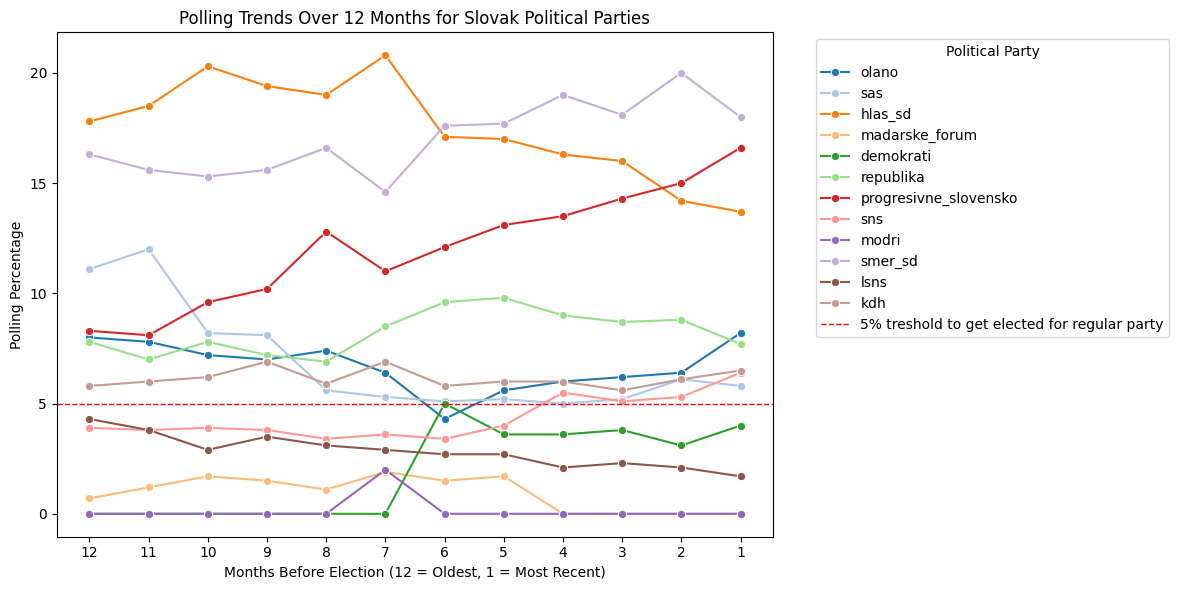

In [5]:

# Melt the monthly polling columns (1, 2, ..., 12) into a long format
polling_columns = [str(i) for i in range(1, 13)]
polls_long = data_last_election.melt(
    id_vars=['political_party', 'election_date', 'election_result', 'elected_to_parliament', 
             'in_coalition_before', 'in_opposition_before'],
    value_vars=polling_columns,
    var_name='month',
    value_name='poll_percentage'
)

polls_long['month'] = polls_long['month'].astype(int)

polls_long['month'] = 13 - polls_long['month']  # Reverse month order (1 becomes 12, 12 becomes 1)

# Plot polling trends for each political party
plt.figure(figsize=(12, 6))
sns.lineplot(data=polls_long, x='month', y='poll_percentage', hue='political_party', marker='o',  palette='tab20')

# Customize the plot
plt.title('Polling Trends Over 12 Months for Slovak Political Parties')
plt.axhline(y=5, color='red', linestyle='--', linewidth=1, label='5% treshold to get elected for regular party')
plt.xlabel('Months Before Election (12 = Oldest, 1 = Most Recent)')
plt.ylabel('Polling Percentage')
plt.legend(title='Political Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(1, 13), labels=range(12, 0, -1))  # Reverse x-axis labels
plt.tight_layout()

# Show the plot
plt.show()


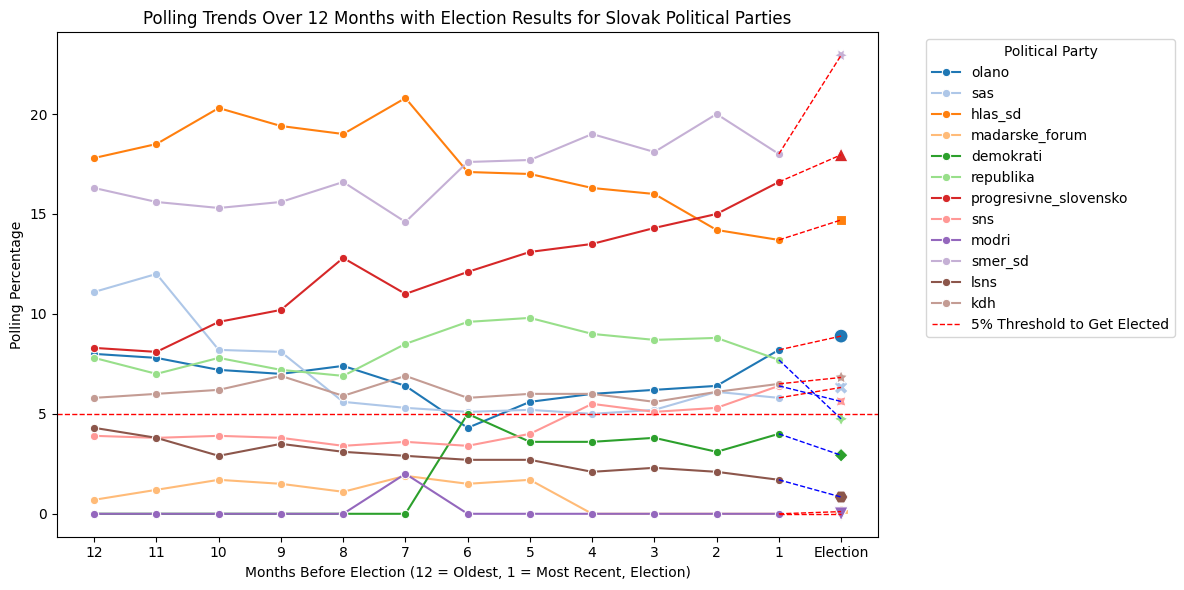

In [13]:
# Prepare the data for the 1-month poll and election results
poll_and_results = polls_long[polls_long['month'] == 12][['political_party', 'poll_percentage', "election_result"]]
palette = sns.color_palette('tab20', n_colors=poll_and_results["political_party"].nunique())
plt.figure(figsize=(12, 6))
sns.lineplot(data=polls_long, x='month', y='poll_percentage', hue='political_party', marker='o', palette=palette)

# Add lines connecting 1-month poll to election result
for _, row in poll_and_results.iterrows():
    if row['poll_percentage'] <= row['election_result']:
        plt.plot(
            [12, 13],  
            [row['poll_percentage'], row['election_result']],  
            color='red', linestyle='--', linewidth=1
        )
    else:
        plt.plot(
            [12, 13],  
            [row['poll_percentage'], row['election_result']],  
            color='blue', linestyle='--', linewidth=1
        )

sns.scatterplot(data=poll_and_results, x=[13] * len(poll_and_results), y='election_result', 
                hue='political_party', style='political_party', s=100, palette=palette, legend=False)

plt.title('Polling Trends Over 12 Months with Election Results for Slovak Political Parties')
plt.axhline(y=5, color='red', linestyle='--', linewidth=1, label='5% Threshold to Get Elected')
plt.xlabel('Months Before Election (12 = Oldest, 1 = Most Recent, Election)')
plt.ylabel('Polling Percentage')
plt.legend(title='Political Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=list(range(1, 13)) + [13], labels=list(range(12, 0, -1)) + ['Election'])  # Add "Election" at x=13
plt.tight_layout()

plt.show()

In [17]:
#data about getting to parlament/forming coalition or oppossition
data_coalition: pd.DataFrame = pd.read_csv("../data/elected_parties.csv")
data_coalition.head()

,political_party,until,coalition
0,sdku_ds,2012-03-10,1
1,smer_sd,2012-03-10,0
2,sas,2012-03-10,1
3,kdh,2012-03-10,1
4,most_hid,2012-03-10,1


In [19]:
#data purely about election result
data_election_result: pd.DataFrame = pd.read_csv("../data/election_results.csv")
data_election_result.head()

,political_party,2012,2016,2020,2023
0,zeleni,0.30,NaN,NaN,NaN
1,kdh,8.82,4.94,4.65,6.82
2,sdl,0.18,NaN,NaN,NaN
3,sns,4.55,8.64,3.16,5.62
4,olano,8.55,11.02,25.02,8.89


In [32]:
data_coalition['until_year'] = pd.to_datetime(data_coalition['until']).dt.year
coalition_mapping = data_coalition.pivot_table(
    index='political_party', 
    columns='until_year', 
    values='coalition', 
    fill_value=0
).reset_index()
coalition_mapping.columns.name = None
coalition_mapping.rename(columns=lambda x: f"coalition_{x}" if isinstance(x, int) else x, inplace=True)


# Merge with coalition data for each year
df_combined = pd.merge(
    data_election_result, 
    coalition_mapping, 
    on='political_party', 
    how='left'
)
df_combined = df_combined.fillna(0)
df_combined
columns_to_check = ['2012', '2016', '2020', '2023']

# Filter out rows where the number of 0s in the specified columns is greater than 1
df_filtered = df_combined[df_combined[columns_to_check].ne(0).sum(axis=1) > 1]
df_filtered

,political_party,2012,2016,2020,2023,coalition_2012,coalition_2016,coalition_2020,coalition_2023,coalition_2024
1,kdh,8.82,4.94,4.65,6.82,1.0,0.0,0.0,0.0,0.0
3,sns,4.55,8.64,3.16,5.62,0.0,0.0,1.0,0.0,1.0
4,olano,8.55,11.02,25.02,8.89,0.0,0.0,0.0,1.0,0.0
5,sas,5.88,12.10,6.22,6.32,1.0,0.0,0.0,1.0,0.0
7,nas_kraj,0.19,0.00,0.00,0.31,0.0,0.0,0.0,0.0,0.0
9,lsns,1.58,8.04,7.97,0.84,0.0,0.0,0.0,0.0,0.0
10,smer_sd,44.41,28.28,18.29,22.94,0.0,1.0,1.0,0.0,1.0
12,kss,0.72,0.62,0.00,0.33,0.0,0.0,0.0,0.0,0.0
13,most_hid,6.89,6.50,2.05,0.26,1.0,0.0,1.0,0.0,0.0
14,99_obciansky_hlas,1.58,0.00,0.00,0.04,0.0,0.0,0.0,0.0,0.0
